In [1]:
from params import ReaxParams
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
p = ReaxParams("ffield.reax.chenoweth")

In [3]:
p.general['p_boc1']

{50.0}

In [4]:
p.atoms['C']['mass']

12.0

In [5]:
p.atoms['C']['itype']

1

In [6]:
p.offdiag[(1,2)]

{'D_ij': 0.1219,
 'Rvdw': 1.4,
 'alfa': 9.8442,
 'ro_sigma': 1.1203,
 'ro_pi': -1.0,
 'ro_pipi': -1.0}

In [7]:
p.bonds[(1,1)]['p_be1']

-0.8157

In [8]:
# for C-C in ethane
def bond_energy(boij, p): #bond order between i and j, p parameter set, element i, element j
    boij=2.94
    return - p.atoms['C']['Dij'] * boij * np.exp(p.bonds[(1,1)]['p_be1'] * (1 - boij ** p.bonds[(1,1)]['p_be2']))
bo=0
print(bond_energy(bo,p))

-0.9102927519798281


In [9]:
# for C-C in ethane
def bond_energy(boij, p): #bond order between i and j, p parameter set, element i, element j
    boij=1.67
    return - p.atoms['C']['Dij'] * boij * np.exp(p.bonds[(1,1)]['p_be1'] * (1 - boij ** p.bonds[(1,1)]['p_be2']))
bo=0
print(bond_energy(bo,p))

-0.3829693062869658


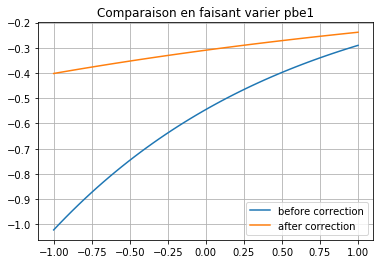

In [10]:
# Effets de la variation de pbe1
def bond_energy(boij, p, be1): #bond order between i and j, p parameter set, element i, element j
    boij=2.94
    return - p.atoms['C']['Dij'] * boij * np.exp(be1 * (1 - boij ** p.bonds[(1,1)]['p_be2']))
x1=[]
y1=[]
bo=0
x0 = np.linspace(-100,100)
for i in x0:
    be1 = -(i/100)
    x1.append(be1)
    y1.append(bond_energy(bo,p,be1))
    
def bond_energy(boij, p, be1): #bond order between i and j, p parameter set, element i, element j
    boij=1.67
    return - p.atoms['C']['Dij'] * boij * np.exp(be1 * (1 - boij ** p.bonds[(1,1)]['p_be2']))
x2=[]
y2=[]
bo=0
x0 = np.linspace(-100,100)
for i in x0:
    be1 = -(i/100) #pbe1 de -1 to 1
    x2.append(be1)
    y2.append(bond_energy(bo,p,be1))
    
plt.title("Comparaison en faisant varier pbe1")
plt.plot(x1,y1,label='before correction')
plt.plot(x2,y2,label='after correction')
plt.grid()
plt.legend()

In [11]:
p.bonds[(1,1)]['p_be2']

0.4527

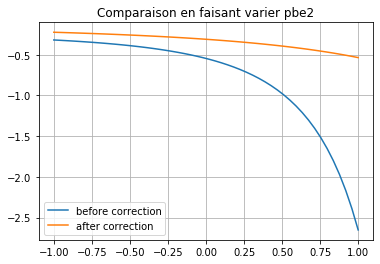

In [12]:
# Effets de la variation de pbe2
def bond_energy(boij, p, be2): #bond order between i and j, p parameter set, element i, element j
    boij=2.94
    return - p.atoms['C']['Dij'] * boij * np.exp(p.bonds[(1,1)]['p_be1'] * (1 - boij ** be2))
x3=[]
y3=[]
bo=0
x0 = np.linspace(-100,100)
for i in x0:
    be2 = -(i/100)
    x3.append(be2)
    y3.append(bond_energy(bo,p,be2))
    
def bond_energy(boij, p, be2): #bond order between i and j, p parameter set, element i, element j
    boij=1.67
    return - p.atoms['C']['Dij'] * boij * np.exp(p.bonds[(1,1)]['p_be1'] * (1 - boij ** be2))
x4=[]
y4=[]
bo=0
x0 = np.linspace(-100,100)
for i in x0:
    be2 = -(i/100) #pbe2 de -1 to 1
    x4.append(be2)
    y4.append(bond_energy(bo,p,be2))
    
plt.title("Comparaison en faisant varier pbe2")
plt.plot(x3,y3,label='before correction')
plt.plot(x4,y4,label='after correction')
plt.grid()
plt.legend()

In [13]:
rcParams['figure.figsize'] = 5,5
plt.plot(x2,y2,label='pbe1 variation after correction')
plt.plot(x4,y4,label='pbe2 variation after correction')
plt.grid()
plt.legend()

In [23]:
p.bonds[(1,1)]['De_sigma']

156.5953

In [24]:
# heatmap
def bond_energy(boij, p, be1, be2): #bond order between i and j, p parameter set, element i, element j
    boij=1.67
    return - p.bonds[(1,1)]['De_sigma'] * boij * np.exp(be1 * (1 - boij ** be2))
x5=[]
x6=[]
y1=[]
bo=0
x0 = np.linspace(-100,100,10)
x5 = np.round(x0/100,2)
x6 = np.round(x0/100,2)
for i in x0:
    be1 = -(i/100) #pbe1 de -1 to 1
    #x5.append(be1)
    #x6.append(be1)
    m=[]
    for j in x0:
        be2 = -(j/100) #pbe2 de -1 to 1
        m.append(bond_energy(bo,p,be1,be2))
    y1.append(m)

In [25]:
rcParams['figure.figsize'] = 20, 20
rcParams['font.size'] = 24
#pal = sns.color_palette("BuGn_r")
heat_map=sns.heatmap(y1,xticklabels=x5,yticklabels=x6,linewidths=.5,cbar_kws={'label': r'$E_{bond}$'})#,cmap=pal)#,annot=True)
print("pbe1=-1,pbe2=1",np.round(bond_energy(bo,p,-1,1),2))
print("pbe1=1, pbe2=-1",np.round(bond_energy(bo,p,1,-1),2))
plt.xlabel(r"$p_{be1}$")
plt.ylabel(r"$p_{be2}$")
plt.title(r"Heat map showing the effect of the variation of $p_{be1}$ and $p_{be2}$"+"\n on the bond energy for a single C-C bond in ethane")
plt.savefig("./pbe1_pbe2_heatmap.png")

pbe1=-1,pbe2=1 -511.06
pbe1=1, pbe2=-1 -390.6
